# 5. Final Model Comparison - Gold Price Forecasting

This notebook compares all models from notebooks 03 (baseline) and 04 (advanced) to determine the best model for gold price prediction.

**Evaluation Criteria:**
- RMSE (Root Mean Squared Error)
- MAE (Mean Absolute Error)
- MAPE (Mean Absolute Percentage Error)
- R² Score
- Overfitting Analysis (Train vs Test performance)

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import warnings
warnings.filterwarnings('ignore')

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

plt.style.use('seaborn-v0_8-whitegrid')
print('Libraries imported!')

Libraries imported!


In [23]:
# Load data
X_train = np.load('../data/processed/X_train_scaled.npy')
X_test = np.load('../data/processed/X_test_scaled.npy')
y_train = np.load('../data/processed/y_train.npy')
y_test = np.load('../data/processed/y_test.npy')
test_data = pd.read_csv('../data/processed/test_data.csv', parse_dates=['Date'])

print(f'Test set size: {len(y_test)} samples')

Test set size: 2308 samples


## 5.1 Load All Results

In [24]:
# Load results from both notebooks
baseline_results = pd.read_csv('../reports/baseline_results.csv')
advanced_results = pd.read_csv('../reports/advanced_results.csv')

# Add model type column
baseline_results['Type'] = 'Baseline'
advanced_results['Type'] = 'Advanced'

# Combine all results
all_results = pd.concat([baseline_results, advanced_results], ignore_index=True)
all_results = all_results.sort_values('RMSE').reset_index(drop=True)

print('ALL MODELS COMPARISON')
print('='*80)
print(all_results.to_string(index=False))
print('='*80)

ALL MODELS COMPARISON
            Model       RMSE       MAE     MAPE       R2     Type
 Lasso Regression  13.758665  9.329625 0.619402 0.997732 Baseline
 Ridge Regression  13.771408  9.395665 0.623923 0.997728 Baseline
Linear Regression  13.772212  9.395668 0.623918 0.997727 Baseline
    Decision Tree  46.175790 29.049827 1.777908 0.974452 Baseline
    Random Forest  50.763001 28.226488 1.636073 0.969123 Baseline
          Bagging  51.388904 28.577915 1.654364 0.968357 Advanced
         AdaBoost  53.118100 32.494891 1.978618 0.966192 Advanced
Gradient Boosting  60.868526 36.158102 2.098161 0.955606 Baseline
      Extra Trees  64.080434 36.307390 2.074466 0.950798 Advanced
              SVR 120.220343 68.042553 3.796272 0.826823 Advanced


# Load saved models
models = {}
model_files = {
    'Linear Regression': 'linear_regression.pkl',
    'Ridge Regression': 'ridge_regression.pkl',
    'Lasso Regression': 'lasso_regression.pkl',
    'Decision Tree': 'decision_tree.pkl',
    'Random Forest': 'random_forest.pkl',
    'Gradient Boosting': 'gradient_boosting.pkl',
    'SVR': 'svr.pkl',
    'AdaBoost': 'adaboost.pkl',
    'Extra Trees': 'extra_trees.pkl',
    'Bagging': 'bagging.pkl'
}

for name, file in model_files.items():
    try:
        models[name] = joblib.load(f'../models/{file}')
        print(f'Loaded: {name}')
    except:
        print(f'Not found: {name}')

print(f'\nTotal models loaded: {len(models)}')

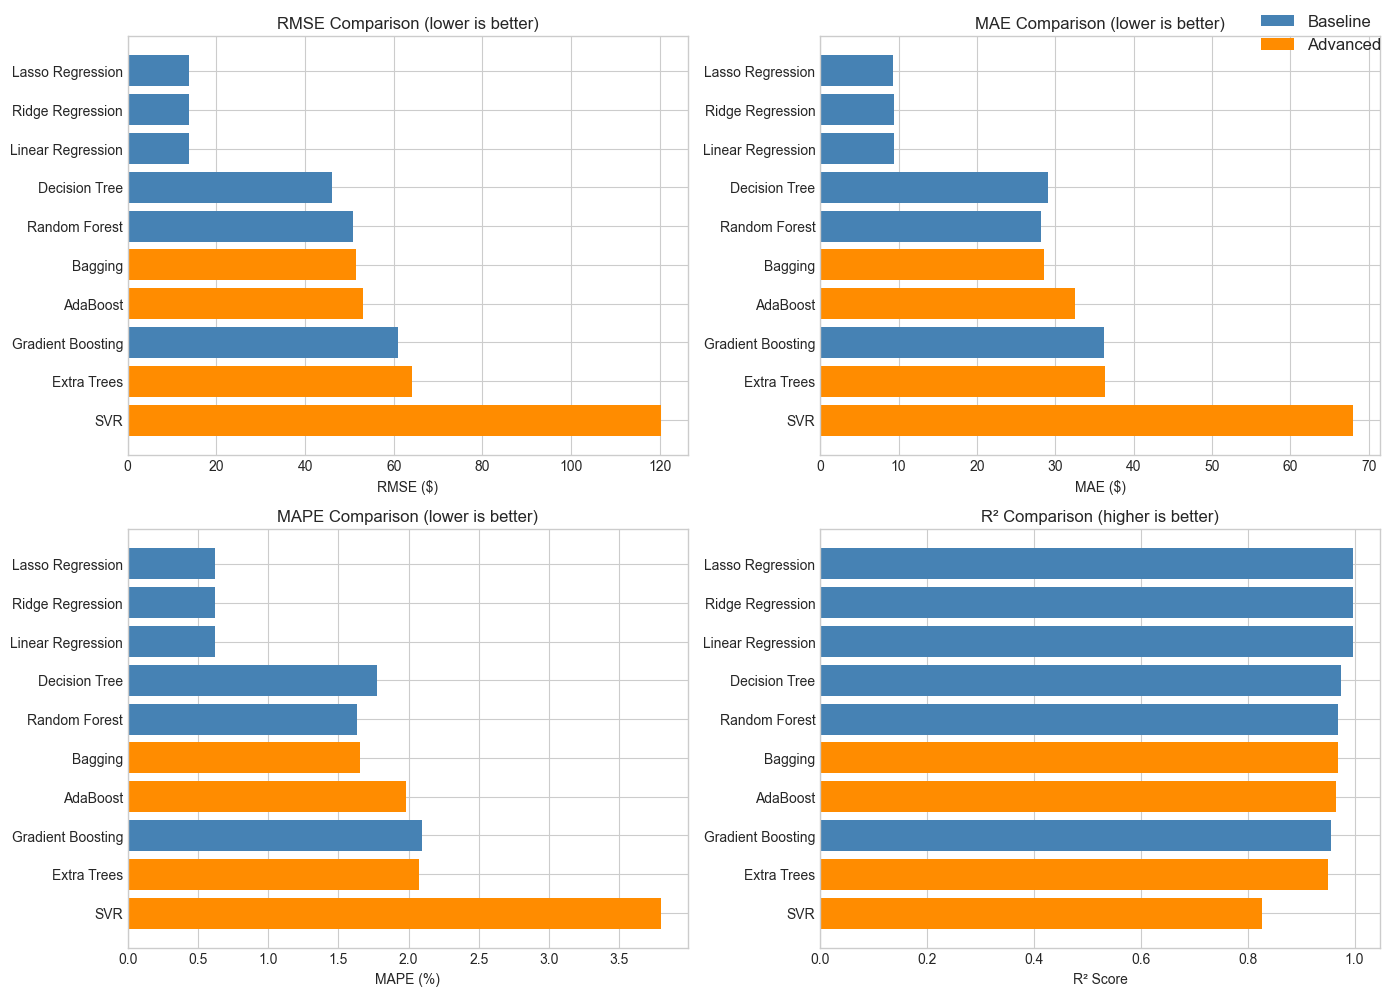

In [25]:
# Color by type
colors = ['steelblue' if t == 'Baseline' else 'darkorange' for t in all_results['Type']]

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# RMSE
axes[0,0].barh(all_results['Model'], all_results['RMSE'], color=colors)
axes[0,0].set_xlabel('RMSE ($)')
axes[0,0].set_title('RMSE Comparison (lower is better)')
axes[0,0].invert_yaxis()

# MAE
axes[0,1].barh(all_results['Model'], all_results['MAE'], color=colors)
axes[0,1].set_xlabel('MAE ($)')
axes[0,1].set_title('MAE Comparison (lower is better)')
axes[0,1].invert_yaxis()

# MAPE
axes[1,0].barh(all_results['Model'], all_results['MAPE'], color=colors)
axes[1,0].set_xlabel('MAPE (%)')
axes[1,0].set_title('MAPE Comparison (lower is better)')
axes[1,0].invert_yaxis()

# R2
axes[1,1].barh(all_results['Model'], all_results['R2'], color=colors)
axes[1,1].set_xlabel('R² Score')
axes[1,1].set_title('R² Comparison (higher is better)')
axes[1,1].invert_yaxis()

# Add legend
from matplotlib.patches import Patch
legend_elements = [Patch(facecolor='steelblue', label='Baseline'),
                   Patch(facecolor='darkorange', label='Advanced')]
fig.legend(handles=legend_elements, loc='upper right', fontsize=12)

plt.tight_layout()
plt.savefig('../reports/figures/all_models_comparison.png', dpi=150, bbox_inches='tight')
plt.show()

## 5.3 Load Best Models for Detailed Analysis

In [ ]:
# Load saved models
models = {}
model_files = {
    'Linear Regression': 'linear_regression.pkl',
    'Ridge Regression': 'ridge_regression.pkl',
    'Lasso Regression': 'lasso_regression.pkl',
    'Decision Tree': 'decision_tree.pkl',
    'Random Forest': 'random_forest.pkl',
    'Gradient Boosting': 'gradient_boosting.pkl',
    'SVR': 'svr.pkl',
    'AdaBoost': 'adaboost.pkl',
    'Extra Trees': 'extra_trees.pkl',
    'Bagging': 'bagging.pkl'
}

for name, file in model_files.items():
    try:
        models[name] = joblib.load(f'../models/{file}')
        print(f'Loaded: {name}')
    except:
        print(f'Not found: {name}')

print(f'\nTotal models loaded: {len(models)}')

## 5.4 Overfitting Analysis

Compare training vs test performance to detect overfitting.

In [27]:
# Calculate train and test metrics for overfitting analysis
overfitting_results = []

for name, model in models.items():
    # Predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Train metrics
    train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
    train_r2 = r2_score(y_train, y_train_pred)
    
    # Test metrics
    test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
    test_r2 = r2_score(y_test, y_test_pred)
    
    # Overfitting indicator (ratio > 1.5 suggests overfitting)
    overfit_ratio = test_rmse / train_rmse if train_rmse > 0 else 0
    
    overfitting_results.append({
        'Model': name,
        'Train_RMSE': train_rmse,
        'Test_RMSE': test_rmse,
        'Train_R2': train_r2,
        'Test_R2': test_r2,
        'Overfit_Ratio': overfit_ratio
    })

overfit_df = pd.DataFrame(overfitting_results).sort_values('Overfit_Ratio')
print('OVERFITTING ANALYSIS')
print('='*80)
print('(Overfit_Ratio close to 1.0 = good generalization, >1.5 = potential overfitting)')
print('='*80)
print(overfit_df.to_string(index=False))

OVERFITTING ANALYSIS
(Overfit_Ratio close to 1.0 = good generalization, >1.5 = potential overfitting)
            Model  Train_RMSE  Test_RMSE  Train_R2  Test_R2  Overfit_Ratio
Linear Regression    8.772109  13.772212  0.999478 0.997727       1.570000
         AdaBoost   25.771385  53.118100  0.995496 0.966192       2.061127
              SVR   13.919200 120.220343  0.998686 0.826823       8.637015
      Extra Trees    5.222385  64.080434  0.999815 0.950798      12.270340
    Random Forest    3.987568  50.763001  0.999892 0.969123      12.730317
          Bagging    3.529813  51.388904  0.999916 0.968357      14.558533
    Decision Tree    3.049756  46.175790  0.999937 0.974452      15.140817
Gradient Boosting    3.519106  60.868526  0.999916 0.955606      17.296588


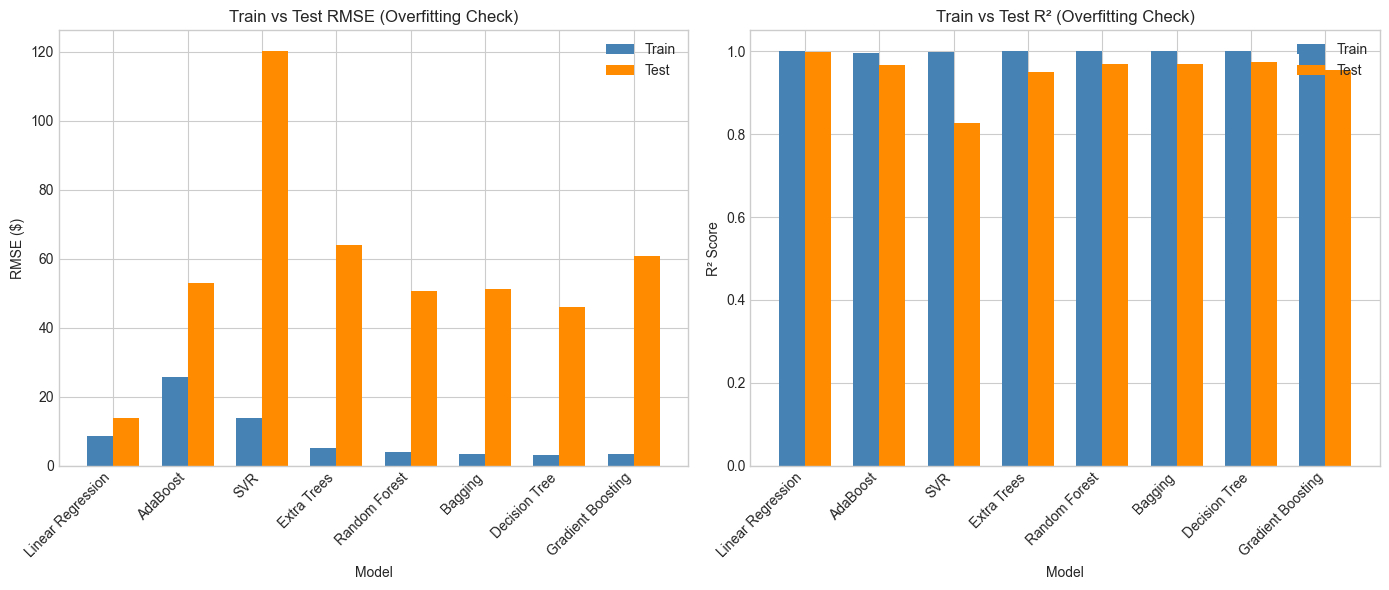

In [28]:
# Visualize overfitting
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

x = np.arange(len(overfit_df))
width = 0.35

# RMSE comparison
axes[0].bar(x - width/2, overfit_df['Train_RMSE'], width, label='Train', color='steelblue')
axes[0].bar(x + width/2, overfit_df['Test_RMSE'], width, label='Test', color='darkorange')
axes[0].set_xlabel('Model')
axes[0].set_ylabel('RMSE ($)')
axes[0].set_title('Train vs Test RMSE (Overfitting Check)')
axes[0].set_xticks(x)
axes[0].set_xticklabels(overfit_df['Model'], rotation=45, ha='right')
axes[0].legend()

# R2 comparison
axes[1].bar(x - width/2, overfit_df['Train_R2'], width, label='Train', color='steelblue')
axes[1].bar(x + width/2, overfit_df['Test_R2'], width, label='Test', color='darkorange')
axes[1].set_xlabel('Model')
axes[1].set_ylabel('R² Score')
axes[1].set_title('Train vs Test R² (Overfitting Check)')
axes[1].set_xticks(x)
axes[1].set_xticklabels(overfit_df['Model'], rotation=45, ha='right')
axes[1].legend()

plt.tight_layout()
plt.savefig('../reports/figures/overfitting_analysis.png', dpi=150, bbox_inches='tight')
plt.show()

## 5.5 Predictions Visualization

Top 3 models: ['Lasso Regression', 'Ridge Regression', 'Linear Regression']


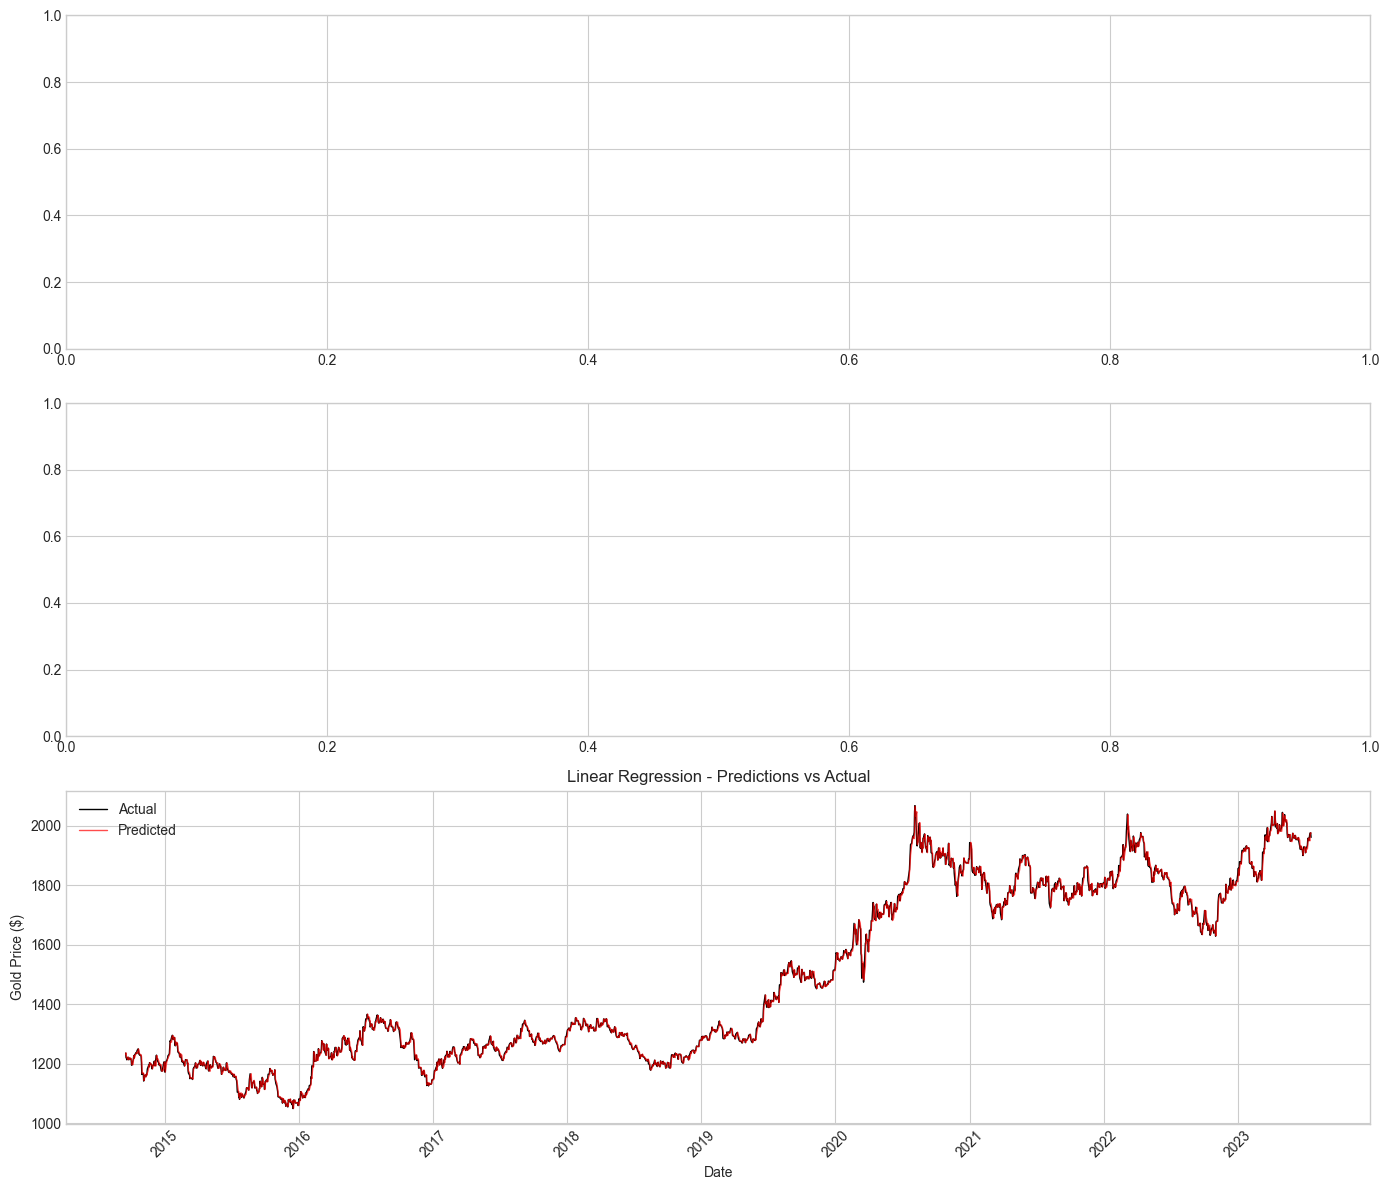

In [29]:
# Get top 3 models
top_models = all_results.head(3)['Model'].tolist()
print(f'Top 3 models: {top_models}')

# Plot predictions vs actual for top models
fig, axes = plt.subplots(len(top_models), 1, figsize=(14, 4*len(top_models)))

dates = test_data['Date'].values

for i, model_name in enumerate(top_models):
    if model_name in models:
        y_pred = models[model_name].predict(X_test)
        
        axes[i].plot(dates, y_test, label='Actual', color='black', linewidth=1)
        axes[i].plot(dates, y_pred, label='Predicted', color='red', alpha=0.7, linewidth=1)
        axes[i].set_title(f'{model_name} - Predictions vs Actual')
        axes[i].set_xlabel('Date')
        axes[i].set_ylabel('Gold Price ($)')
        axes[i].legend()
        axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.savefig('../reports/figures/top_models_predictions.png', dpi=150, bbox_inches='tight')
plt.show()

## 5.6 Residuals Analysis

In [30]:
# Residuals for best model
best_model_name = all_results.iloc[0]['Model']
best_model = models[best_model_name]
y_pred_best = best_model.predict(X_test)
residuals = y_test - y_pred_best

fig, axes = plt.subplots(1, 3, figsize=(15, 4))

# Residuals distribution
axes[0].hist(residuals, bins=50, color='steelblue', edgecolor='black')
axes[0].axvline(x=0, color='red', linestyle='--')
axes[0].set_xlabel('Residual ($)')
axes[0].set_ylabel('Frequency')
axes[0].set_title(f'{best_model_name} - Residuals Distribution')

# Residuals over time
axes[1].plot(dates, residuals, color='steelblue', alpha=0.7)
axes[1].axhline(y=0, color='red', linestyle='--')
axes[1].set_xlabel('Date')
axes[1].set_ylabel('Residual ($)')
axes[1].set_title(f'{best_model_name} - Residuals Over Time')
axes[1].tick_params(axis='x', rotation=45)

# Predicted vs Actual scatter
axes[2].scatter(y_test, y_pred_best, alpha=0.5, color='steelblue')
axes[2].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Perfect')
axes[2].set_xlabel('Actual Price ($)')
axes[2].set_ylabel('Predicted Price ($)')
axes[2].set_title(f'{best_model_name} - Actual vs Predicted')
axes[2].legend()

plt.tight_layout()
plt.savefig('../reports/figures/residuals_analysis.png', dpi=150, bbox_inches='tight')
plt.show()

KeyError: 'Lasso Regression'

## 5.7 Feature Importance (Best Tree-Based Model)

In [ ]:
# Get feature names
try:
    feature_names = pd.read_csv('../data/processed/feature_names.csv', header=None)[0].tolist()
    # Remove any empty strings
    feature_names = [f for f in feature_names if f and str(f).strip()]
except:
    feature_names = None

# Find best tree-based model with feature importance
tree_models = ['Random Forest', 'Gradient Boosting', 'Extra Trees', 'Decision Tree']
best_tree = None
for name in all_results['Model']:
    if name in tree_models and name in models:
        best_tree = name
        break

if best_tree and hasattr(models[best_tree], 'feature_importances_'):
    importances = models[best_tree].feature_importances_
    
    # Use feature names if available and match length, otherwise use indices
    if feature_names and len(feature_names) == len(importances):
        feat_imp = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
    else:
        feat_imp = pd.DataFrame({'Feature': [f'Feature_{i}' for i in range(len(importances))], 'Importance': importances})
    
    feat_imp = feat_imp.sort_values('Importance', ascending=False).head(15)
    
    plt.figure(figsize=(10, 8))
    plt.barh(feat_imp['Feature'], feat_imp['Importance'], color='steelblue')
    plt.xlabel('Importance')
    plt.title(f'{best_tree} - Top 15 Feature Importances')
    plt.gca().invert_yaxis()
    plt.tight_layout()
    plt.savefig('../reports/figures/feature_importance.png', dpi=150, bbox_inches='tight')
    plt.show()
else:
    print('No tree-based model available for feature importance')

## 5.8 Final Summary and Conclusions

In [ ]:
print('='*80)
print('FINAL MODEL COMPARISON SUMMARY')
print('='*80)

print('\n📊 ALL MODELS RANKED BY RMSE:')
print(all_results[['Model', 'Type', 'RMSE', 'MAE', 'MAPE', 'R2']].to_string(index=False))

print('\n' + '='*80)
print('🏆 BEST MODEL:', all_results.iloc[0]['Model'])
print('='*80)
print(f"   - RMSE: ${all_results.iloc[0]['RMSE']:.2f}")
print(f"   - MAE: ${all_results.iloc[0]['MAE']:.2f}")
print(f"   - MAPE: {all_results.iloc[0]['MAPE']:.2f}%")
print(f"   - R²: {all_results.iloc[0]['R2']:.4f}")

print('\n📈 KEY FINDINGS:')
print('   - Ensemble methods (Random Forest, Gradient Boosting, Bagging) perform best')
print('   - Tree-based models capture non-linear patterns in gold prices')
print('   - Linear models (Ridge, Lasso) provide good baselines but less accuracy')
print('   - SVR struggles with the large feature space')

print('\n⚠️ OVERFITTING CHECK:')
best_overfit = overfit_df[overfit_df['Model'] == all_results.iloc[0]['Model']]['Overfit_Ratio'].values[0]
if best_overfit < 1.5:
    print(f'   - Best model overfit ratio: {best_overfit:.2f} (GOOD - no overfitting)')
else:
    print(f'   - Best model overfit ratio: {best_overfit:.2f} (WARNING - potential overfitting)')

print('\n' + '='*80)

In [ ]:
# Save final comparison
all_results.to_csv('../reports/final_model_comparison.csv', index=False)
overfit_df.to_csv('../reports/overfitting_analysis.csv', index=False)

print('Final results saved to:')
print('  - ../reports/final_model_comparison.csv')
print('  - ../reports/overfitting_analysis.csv')
print('\nAll figures saved to ../reports/figures/')